<a href="https://colab.research.google.com/github/mjmousavi97/Graph-Neural-Networks/blob/main/07_Vanilla_Neural_Networks/src/Node_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Project: Predicting Web Traffic with Node Regression

## 🧩 Overview
Goal: Predict the **log average monthly traffic (Dec 2018)** for each Wikipedia page using its **features** and **link structure**.

- **Nodes:** Wikipedia articles  
- **Edges:** Mutual hyperlinks between articles  
- **Node features:** Word presence in articles  
- **Target:** Continuous value (log traffic)

## 🧠 Task Type
**Node Regression** — predict a continuous value for each node (not a category).

## 📊 Dataset
**Wikipedia Network** (Rozemberczki et al., 2019 – GPL v3.0)  
Includes three subgraphs:

| Subgraph | Nodes | Edges |
|-----------|--------|--------|
| Chameleons | 2,277 | 31,421 |
| Crocodiles | 11,631 | 170,918 |
| Squirrels | 5,201 | 198,493 |

## 🎯 Objective
Learn to predict each page’s popularity using **Graph Neural Networks (GNNs)** based on node features and graph connections.


we will apply a GCN to predict this traffic on the chameleon dataset

In [3]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.1 MB/s eta 0:00:00


In [33]:
from torch_geometric.datasets import WikipediaNetwork
import torch_geometric.transforms as transforms
from torch_geometric.utils import degree

import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [5]:
dataset = WikipediaNetwork(root='data/wikipedia', name='chameleon')
transform = transforms.Compose(
    transforms.NormalizeFeatures()
)

data = dataset[0]

Processing...
Done!


In [7]:
print(f'dataset: {dataset}')
print(f'Number of Graphs: {len(dataset)}')
print(f'Number of Nodes: {data.x.shape[0]}')
print(f'Number of features per Node: {data.x.shape[1]}')
print(f'Number of Edges: {data.num_edges}')
print(f'Number of classes: {dataset.num_classes}')
print(f'Labels: {data.y.unique().tolist()}')

dataset: WikipediaNetwork()
Number of Graphs: 1
Number of Nodes: 2277
Number of features per Node: 2325
Number of Edges: 36101
Number of classes: 5
Labels: [0, 1, 2, 3, 4]


In [8]:
from google.colab import files
uploaded = files.upload()

Saving musae_chameleon_target.csv to musae_chameleon_target.csv


In [9]:
df = pd.read_csv('/content/musae_chameleon_target.csv')

In [10]:
df.head()

,id,target
0,0,171
1,1,8089
2,2,8568
3,3,47178
4,4,3634


In [29]:
df.drop('id', axis=1, inplace=True)

In [11]:
df.tail()

,id,target
2272,2272,31418
2273,2273,2716
2274,2274,99
2275,2275,22898
2276,2276,276


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      2277 non-null   int64
 1   target  2277 non-null   int64
dtypes: int64(2)
memory usage: 35.7 KB


In [13]:
df.describe()

,id,target
count,2277.000000,2277.000000
mean,1138.000000,14128.469477
std,657.457603,39638.662208
min,0.000000,15.000000
25%,569.000000,439.000000
50%,1138.000000,2003.000000
75%,1707.000000,11718.000000
max,2276.000000,508957.000000


In [14]:
target_values = np.log10(df['target'])

In [15]:
target_values

,target
0,2.232996
1,3.907895
2,3.932879
3,4.673740
4,3.560385
...,...
2272,4.497179
2273,3.433930
2274,1.995635
2275,4.359798


In [16]:
target_values.describe()

,target
count,2277.000000
mean,3.311093
std,0.928538
min,1.176091
25%,2.642465
50%,3.301681
75%,4.068853
max,5.706681


In [17]:
y = torch.tensor(target_values)
y

tensor([2.2330, 3.9079, 3.9329,  ..., 1.9956, 4.3598, 2.4409],
       dtype=torch.float64)

In [18]:
data.y = y

In [19]:
dir(data)

['__abstractmethods__',
 '__annotations__',
 '__call__',
 '__cat_dim__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__inc__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_edge_attr_cls',
 '_edge_to_layout',
 '_edges_to_layout',
 '_find_parent',
 '_get_edge_index',
 '_get_tensor',
 '_get_tensor_size',
 '_multi_get_tensor',
 '_put_edge_index',
 '_put_tensor',
 '_remove_edge_index',
 '_remove_tensor',
 '_store',
 '_tensor_attr_cls',
 '_to_type',
 '_union',
 'apply',
 'apply_',
 'batch',
 'clone',
 'coalesce',
 'c

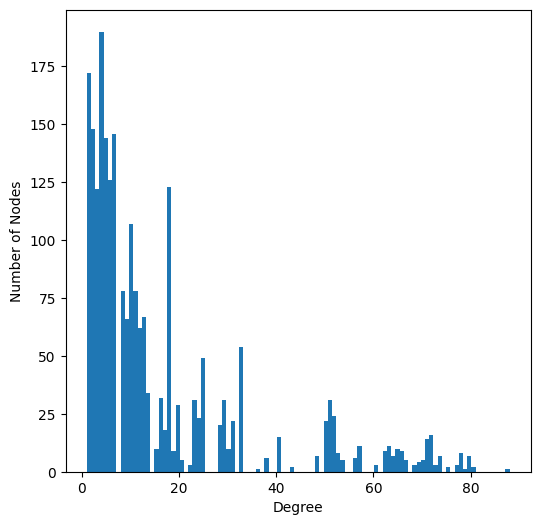

In [28]:
edges = data.edge_index
degrees = degree(edges[0], data.num_nodes)

# Plot histogram of degrees
plt.figure(figsize=(6, 6))
plt.hist(degrees.numpy(), bins=100)
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.show()

## Most nodes have one or a few neighbors, but some of them act as “hubs” and can connect more than 80 nodes

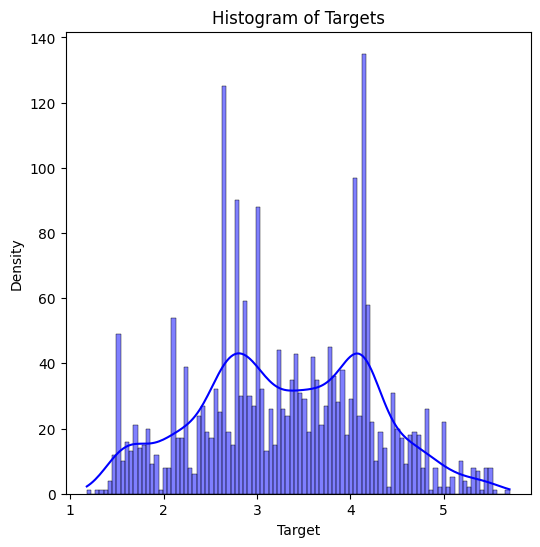

In [36]:
# Plot histogram of Targets
plt.figure(figsize=(6, 6))
sns.histplot(y, bins=100, kde=True, color='blue')
plt.title('Histogram of Targets')
plt.xlabel('Target')
plt.ylabel('Density')
plt.show()

## This distribution is not exactly normal, but it is not exponential like the node degrees either. We can expect our model to perform well to predict these values.